# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

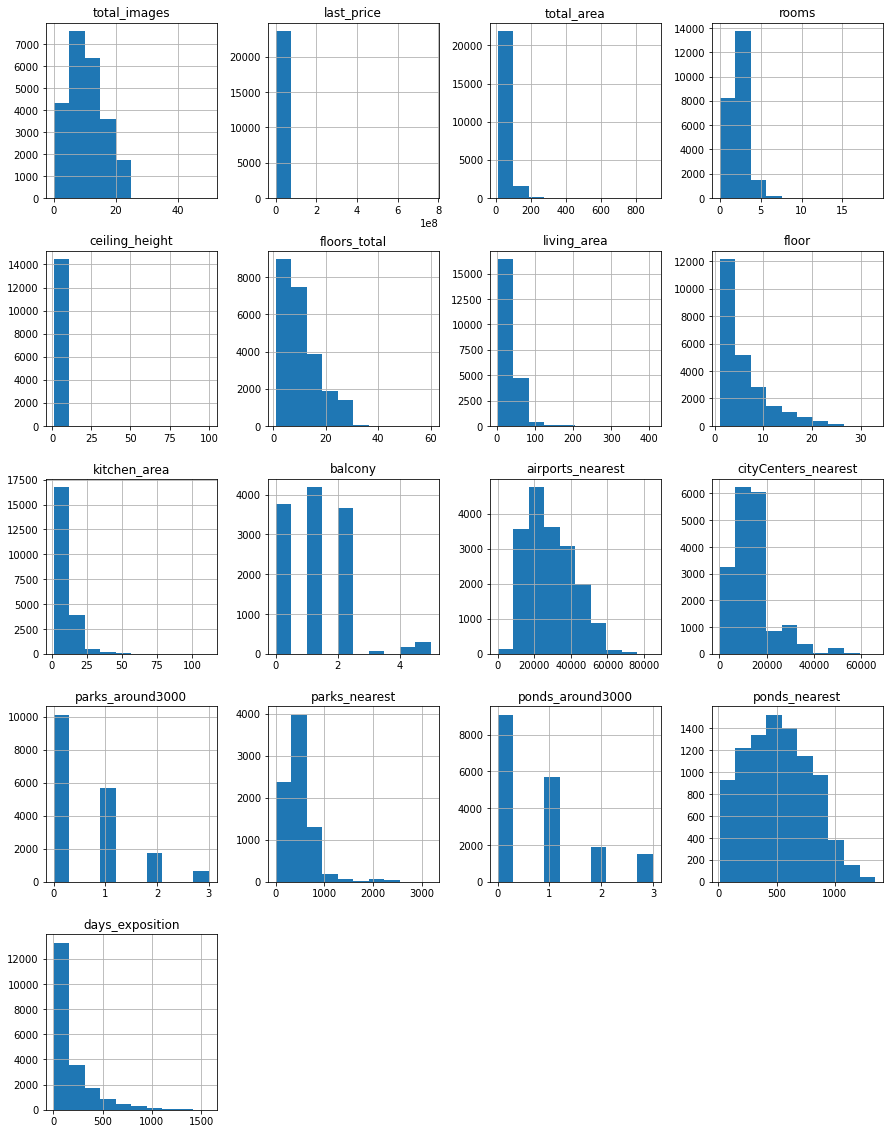

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# откроем файл и изучим первичные данные
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(data.head())
data.info()
data.hist(figsize=(15, 20))

## Заметки по общей информации:

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)                 // нулевые значения //

balcony — число балконов                                                           // нулевые значения, Dtype не тип int //

ceiling_height — высота потолков (м)                                               // нулевые значения//

cityCenters_nearest — расстояние до центра города (м)                              // нулевые значения//

days_exposition — сколько дней было размещено объявление (от публикации до снятия) // нулевые значения, Dtype не тип int//

first_day_exposition — дата публикации,                                            // Dtype не тип datetime//

floor — этаж

floors_total — всего этажей в доме                                                 // нулевые значения, Dtype не тип int//

is_apartment — апартаменты (булев тип)                                             // нулевые значения, Dtype не тип bool//

kitchen_area — площадь кухни в квадратных метрах (м²)                              // нулевые значения//

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)                               // нулевые значения//

locality_name — название населённого пункта                                        // нулевые значения//

open_plan — свободная планировка (булев тип) 

parks_around3000 — число парков в радиусе 3 км                                     // нулевые значения, Dtype не тип int//

parks_nearest — расстояние до ближайшего парка (м)                                 // нулевые значения//

ponds_around3000 — число водоёмов в радиусе 3 км                                   // нулевые значения, Dtype не тип int//

ponds_nearest — расстояние до ближайшего водоёма (м)                               // нулевые значения//

rooms — число комнат                                                               // Dtype не тип int//

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении                              // Dtype не тип int//

### Видим, что большинство признаков в гистограммах распределены нормально. 

# Предобработка данных

In [2]:
# посчитаем количество пропусков по столбцам, заменим пропуски, где это возможно
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [3]:
# получим статистические данные, которые дадут представление о распределении значений
data.describe().round()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.0,23699.0,23699.0,23699.0,14504.0,23613.0,21796.0,23699.0,21421.0,12180.0,18157.0,18180.0,18181.0,8079.0,18181.0,9110.0,20518.0
mean,10.0,6541549.0,60.0,2.0,3.0,11.0,34.0,6.0,11.0,1.0,28794.0,14191.0,1.0,491.0,1.0,518.0,181.0
std,6.0,10887013.0,36.0,1.0,1.0,7.0,22.0,5.0,6.0,1.0,12631.0,8608.0,1.0,342.0,1.0,278.0,220.0
min,0.0,12190.0,12.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,3400000.0,40.0,1.0,3.0,5.0,19.0,2.0,7.0,0.0,18585.0,9238.0,0.0,288.0,0.0,294.0,45.0
50%,9.0,4650000.0,52.0,2.0,3.0,9.0,30.0,4.0,9.0,1.0,26726.0,13098.0,0.0,455.0,1.0,502.0,95.0
75%,14.0,6800000.0,70.0,3.0,3.0,16.0,42.0,8.0,12.0,2.0,37273.0,16293.0,1.0,612.0,1.0,729.0,232.0
max,50.0,763000000.0,900.0,19.0,100.0,60.0,410.0,33.0,112.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0


Проведем необходимые действия, в соответствии с вышеизложенным

In [4]:
# пропуски по высоте потолков составляют порядка 40% значений. поэтому оставим все как есть, ничего не меняя

#заменим пропуски в days_exposition и заменим тип данных
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

#заменим пропуски в balcony на 0 и изменим тип данных на int
data['balcony'] = data['balcony'].fillna(0).astype('int')

# Заменяем пустые значения жилой площади и площади кухни. Посчитаем % жилой площади от общей площади
# и используем его при заполнении пустых значений
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

# для данного поля целесообразно принять пропуски как False
data['is_apartment'] = data['is_apartment'].fillna(False)

# Удаляем записи, где отсутствует локация и этажность
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

# Приводим в целочисленный тип количество парков и прудов. Заменяем пропущенные значения на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

# Приводим в целочисленный тип стоимость квартиры
data['last_price'] = data['last_price'].astype(int)

# Заменим оставишиеся значения в целочисленный тип
data['floors_total'] = data['floors_total'].astype('int')
data['rooms'] = data['rooms'].astype('int')
data['total_images'] = data['total_images'].astype('int')

# Приводим к типу даты дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Проверяем количество пропущенных значений
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition             0
dtype: int64

In [5]:
# посмотрим уникальные значения
data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [6]:
print(data['locality_name'].duplicated().sum())

23201


In [7]:
# приведем данные к единообразию
data['locality_name'] = data['locality_name'].str.replace('поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('посёлок ', '')
data['locality_name'] = data['locality_name'].str.replace('деревня ', '')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('городской ', '')
data['locality_name'] = data['locality_name'].str.replace('коттеджный ', '')
data['locality_name'] = data['locality_name'].str.replace('село ', '')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции ', '')
data['locality_name'] = data['locality_name'].str.replace('городского типа ', '')

In [8]:
print(sorted(data['locality_name'].unique()))

['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров', 'Бокситогорск', 'Большая Вруда', 'Большая Ижора', 'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино', 'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь', 'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево', 'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево', 'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово', 'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка', 'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково', 'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск', 'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво', 'Иссад', 'Калитино', 'Каложицы', 'Кальтино', 'Каменногорск', 'Камышовка', 'Каськово', 'Кел

In [9]:
print(data['locality_name'].duplicated().sum())

23257


#### Количество дубликатов уменьшилось наполовину

In [10]:
# посмотрим уникальные значения
data['ceiling_height'].value_counts()

2.50     3515
2.60     1645
2.70     1571
3.00     1108
2.80      988
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [11]:
# кол-во (комнат = 0) - это явная ошибка. 
# Заменим пропуски в rooms на 1 т.к. общие площади таких квартир соотв. 1-км. квартире
print(data['rooms'][data['rooms']==0].count())
print()
print(data[data['rooms']==0])
data = data.replace({'rooms':{0:1}})

data.describe().round()

194

       total_images  last_price  total_area first_day_exposition  rooms  \
144               1     2450000       27.00           2017-03-30      0   
349               4     2320000       25.00           2017-09-27      0   
440               8     2480000       27.11           2018-03-12      0   
508               0     3375000       34.40           2017-03-28      0   
608               2     1850000       25.00           2019-02-20      0   
...             ...         ...         ...                  ...    ...   
23210             7     3200000       26.00           2017-09-01      0   
23442             0     2500000       27.70           2017-09-28      0   
23554            15     3350000       26.00           2018-09-07      0   
23592            10     1450000       29.00           2017-11-11      0   
23637             8     2350000       26.00           2018-06-26      0   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
144             

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.0,23565.0,23565.0,23565.0,14481.0,23565.0,23565.0,23565.0,23565.0,23565.0,18041.0,18064.0,23565.0,8030.0,23565.0,9036.0,23565.0
mean,10.0,6540058.0,60.0,2.0,3.0,11.0,35.0,6.0,11.0,1.0,28797.0,14193.0,0.0,491.0,1.0,518.0,156.0
std,6.0,10910935.0,36.0,1.0,1.0,7.0,22.0,5.0,6.0,1.0,12632.0,8613.0,1.0,342.0,1.0,278.0,214.0
min,0.0,12190.0,12.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,181.0,0.0,1.0,0.0,13.0,0.0
25%,6.0,3400000.0,40.0,1.0,3.0,5.0,19.0,2.0,7.0,0.0,18565.0,9238.0,0.0,288.0,0.0,293.0,22.0
50%,9.0,4646000.0,52.0,2.0,3.0,9.0,30.0,4.0,9.0,0.0,26757.0,13096.0,0.0,455.0,0.0,503.0,73.0
75%,14.0,6790000.0,70.0,3.0,3.0,16.0,42.0,8.0,12.0,1.0,37273.0,16285.0,1.0,612.0,1.0,730.0,198.0
max,50.0,763000000.0,900.0,19.0,100.0,60.0,410.0,33.0,112.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0


In [12]:
# кол-во (этажей в Кронштадте = 60) вызывает сильное сомнение. Скорее всего это опечатка 6-го этажа
# Заменим 60 этаж на 6
# 52 этаж в Санкт-Петербурге вероятен
print(data[(data['floors_total'] > 40)])
data = data.replace({'floors_total':{60:6}})


       total_images  last_price  total_area first_day_exposition  rooms  \
2253             12     3800000        45.5           2018-06-28      2   
16731             9     3978000        40.0           2018-09-24      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
2253             2.88            60         27.4      4         False  ...   
16731            2.65            52         10.5     18         False  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
2253            7.4        0        Кронштадт           67763.0   
16731          14.0        0  Санкт-Петербург           20728.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
2253              49488.0                 2          342.0                 3   
16731             12978.0                 1          793.0                 0   

       ponds_nearest  days_exposition  
2253           614.0              166  
16731           

In [13]:
# посмотрим уникальные значения столбца
data['ceiling_height'].value_counts()

2.50     3515
2.60     1645
2.70     1571
3.00     1108
2.80      988
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [14]:
# высота потолка до 2 м вызывает подозрение. поэтому избавимся от таких данных
data = data.loc[data['ceiling_height'] >= 2]

In [15]:
# явно высота потолков более 10 м это ошибка в заполнении данных. Поэтому все значения > 20 м поделиv на 10
def ceiling_height_question(row):
    if row['ceiling_height'] > 20:
        return row['ceiling_height'] / 10
    else:
        return row['ceiling_height']
# присваиваем новые значения
data['ceiling_height'] = data.apply(ceiling_height_question, axis=1)
data['ceiling_height'].describe()

count    14478.000000
mean         2.730861
std          0.349871
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

# Посчитайте и добавьте в таблицу новые столбцы

In [16]:
# Добавляем столбец с ценой квадратного метра
data['price_per_meter'] = data['last_price'] / data['total_area']

# Добавляем столбец с днем недели публикации объявления 
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

# Создаём столбец месяца
data['month_exposition'] = data['first_day_exposition'].dt.month

# Создаём столбец года
data['year_exposition'] = data['first_day_exposition'].dt.year

# Создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

# Добавляем столбец с расстоянием до центра в км, округляем до целого
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14478 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14478 non-null  int64         
 1   last_price            14478 non-null  int64         
 2   total_area            14478 non-null  float64       
 3   first_day_exposition  14478 non-null  datetime64[ns]
 4   rooms                 14478 non-null  int64         
 5   ceiling_height        14478 non-null  float64       
 6   floors_total          14478 non-null  int64         
 7   living_area           14478 non-null  float64       
 8   floor                 14478 non-null  int64         
 9   is_apartment          14478 non-null  bool          
 10  studio                14478 non-null  bool          
 11  open_plan             14478 non-null  bool          
 12  kitchen_area          14478 non-null  float64       
 13  balcony         

# 2. Проведите исследовательский анализ данных

## 2.1 Изучаем параметры объектов

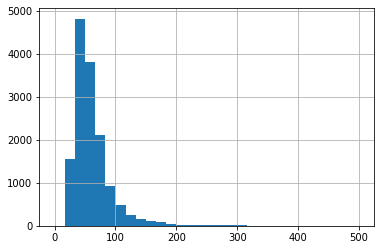

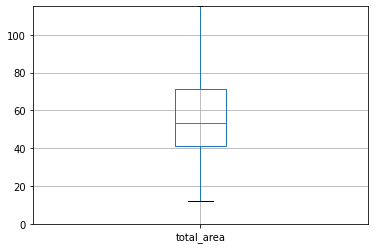

count    13645.000000
mean        55.334232
std         19.670403
min         12.000000
25%         40.100000
50%         51.300000
75%         67.000000
max        115.000000
Name: total_area, dtype: float64

In [17]:
# построим гистограмму по общей площади квартир
data['total_area'].hist(bins=30,  range=(0, 500))
plt.show()

# построим диаграмму размаха, для уточнения границы выброса. Для признака total_area видно, что 
# max значение равно 900,0 в то время как 75% квартиль равен только 69.7.
import matplotlib.pyplot as plt 
plt.ylim(0, 115)
data.boxplot('total_area') 
plt.show()
# Значение от 115 – выброс. Удалим данные с такими значениями, аналогично с жилой площадью и площадью кухонь
data = data.loc[data['total_area'] <= 115]
data['total_area'].describe()
# соответствует распределению Гаусса

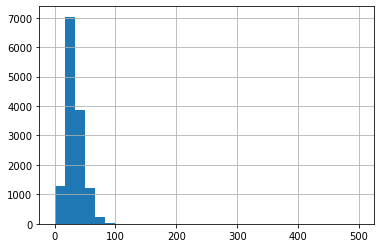

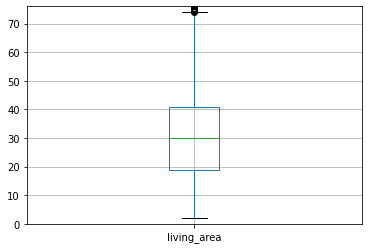

count    13594.000000
mean        31.733419
std         13.313794
min          2.000000
25%         19.000000
50%         30.000000
75%         41.000000
max         76.000000
Name: living_area, dtype: float64

In [18]:
# построим гистограмму по жилой площади квартир
data['living_area'].hist(bins=30,  range=(0, 500))
plt.show()
# построим диаграмму размаха, для уточнения границы выброса. Для признака living_area видно, 
# что max значение равно 409,7 в то время как 75% квартиль равен только 42.1.
import matplotlib.pyplot as plt 
plt.ylim(0, 76)
data.boxplot('living_area') 
plt.show()
# Значение от 76 – выброс. Удалим данные с такими значениями  
data = data.loc[data['living_area'] <= 76]
data['living_area'].describe()
# соответствует распределению Гаусса

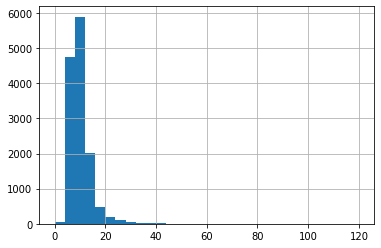

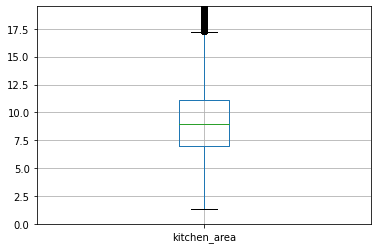

count    13155.000000
mean         9.226053
std          3.039222
min          1.300000
25%          7.000000
50%          8.710000
75%         11.000000
max         19.500000
Name: kitchen_area, dtype: float64

In [19]:
# построим гистограмму по площади кухни
data['kitchen_area'].hist(bins=30,  range=(0, 120))
plt.show()
# построим диаграмму размаха, для уточнения границы выброса. Для признака kitchen_area видно, 
#  что max значение равно 112,0 в то время как 75% квартиль равен только 12.0.
 
import matplotlib.pyplot as plt 
plt.ylim(0, 19.5)
data.boxplot('kitchen_area') 
plt.show()
# Значение от 19,5 – выброс. Удалим данные с такими значениями  
data = data.loc[data['kitchen_area'] <= 19.5]
data['kitchen_area'].describe()
# соответствует распределению Гаусса

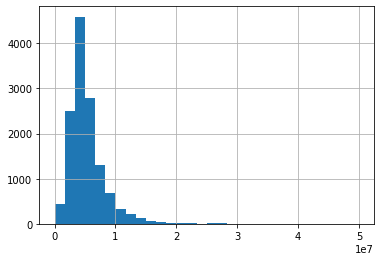

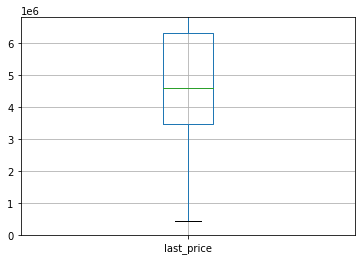

count    1.315500e+04
mean     5.284769e+06
std      3.071531e+06
min      4.500000e+05
25%      3.470000e+06
50%      4.600000e+06
75%      6.300000e+06
max      5.300000e+07
Name: last_price, dtype: float64

In [20]:
# построим гистограмму по стоимости жилья
data['last_price'].hist(bins=30,  range=(0, 50000000))
plt.show()
# построим диаграмму размаха, для уточнения границы выброса. Для признака last_price видно, 
# что max значение равно 112,0 в то время как 75% квартиль равен только 12.0.
 
import matplotlib.pyplot as plt 
plt.ylim(0, 6800000)
data.boxplot('last_price') 
plt.show()
# Значение от 6800000 – выброс.
data['last_price'].describe()
# данные не вызывают вопросов, цены могут быть любыми
# соответствует распределению Гаусса

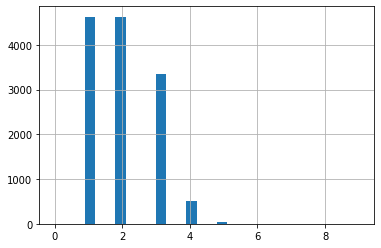

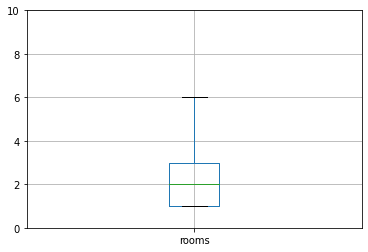

count    13155.000000
mean         1.991106
std          0.891991
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

In [21]:
# построим гистограмму по количеству комнат
data['rooms'].hist(bins=30,  range=(0, 9))
plt.show()
# построим диаграмму размаха, для уточнения границы выброса. Для признака rooms видно, что max значение равно 7,0
# в то время как 75% квартиль равен только 3.0.
import matplotlib.pyplot as plt 
plt.ylim(0, 10)
data.boxplot('rooms') 
plt.show()
# Значение от 6 – выброс.
data['rooms'].describe()
# По количеству комнат имеем классическое распределение Пуассона. 
# данные не вызывают вопросов

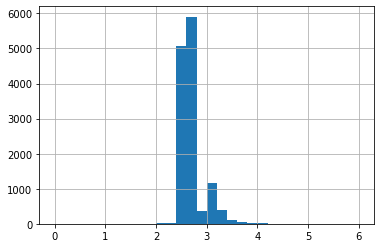

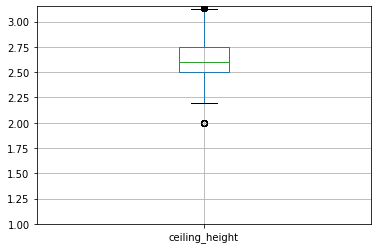

count    13155.000000
mean         2.695802
std          0.324760
min          2.000000
25%          2.500000
50%          2.600000
75%          2.750000
max         20.000000
Name: ceiling_height, dtype: float64

In [55]:
# построим гистограмму по высоте потолка
data['ceiling_height'].hist(bins=30,  range=(0, 6))
plt.show()
# построим диаграмму размаха, для уточнения границы выброса. Для признака ceiling_height видно, 
# что max значение равно 20,0 в то время как 75% квартиль равен только 2,7.
 
import matplotlib.pyplot as plt 
plt.ylim(1, 3.15)
data.boxplot('ceiling_height') 
plt.show()
# Значение до 2,2 м и от 3,14 м – выброс.
data['ceiling_height'].describe()

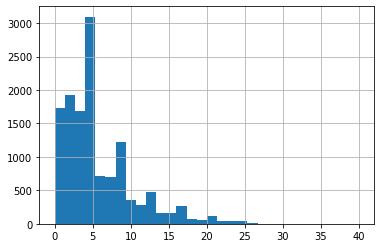

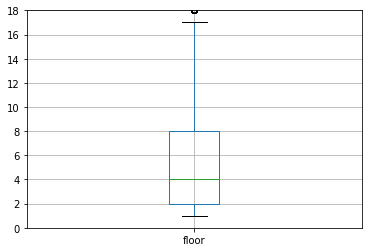

count    13155.000000
mean         5.620372
std          4.608499
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: floor, dtype: float64

In [26]:
# построим гистограмму по этажу квартиры
data['floor'].hist(bins=30,  range=(0, 40))
plt.show()
# построим диаграмму размаха, для уточнения границы выброса. Для признака floor видно, что max значение равно 33,0
# в то время как 75% квартиль равен только 8.
import matplotlib.pyplot as plt 
plt.ylim(0, 18)
data.boxplot('floor') 
plt.show()
# Значение от 17 м – выброс.Выбросы вполне реалистичны
data['floor'].describe()

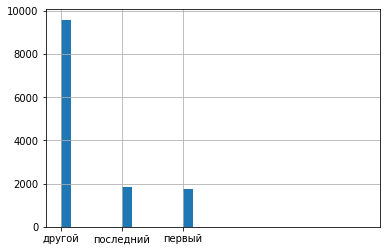

In [27]:
# построим гистограмму по типу этажности
data['floor_type'].hist(bins=30,  range=(0, 5))
plt.show()
# Здесь вопросов нет, все реально

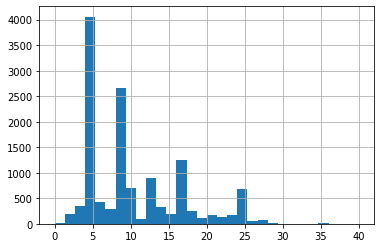

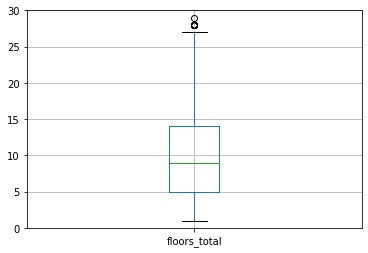

count    13155.000000
mean        10.257013
std          6.184188
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         52.000000
Name: floors_total, dtype: float64

In [28]:
# построим гистограмму по общему кол-ву этажей в доме
data['floors_total'].hist(bins=30,  range=(0, 40))
plt.show()
# построим диаграмму размаха, для уточнения границы выброса. Для признака floors_total видно, 
# что max значение равно 60,0 в то время как 75% квартиль равен только 16.0.
 
import matplotlib.pyplot as plt 
plt.ylim(0, 30)
data.boxplot('floors_total') 
plt.show()
# Значение от 29 – выброс. Оставляем данные без изменений
data['floors_total'].describe()

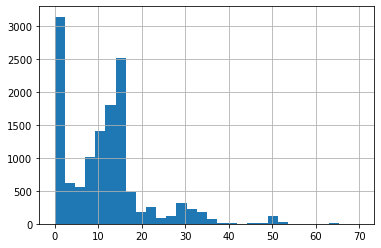

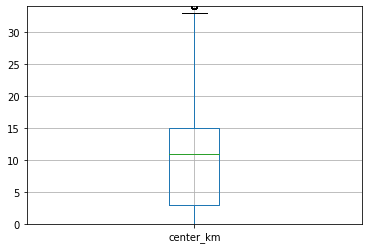

count    13155.000000
mean        11.126112
std          9.646093
min          0.000000
25%          3.000000
50%         11.000000
75%         15.000000
max         65.000000
Name: center_km, dtype: float64

In [29]:
# построим гистограмму по расстоянию до центра города в км
data['center_km'].hist(bins=30,  range=(0, 70))
plt.show()
# построим диаграмму размаха, для уточнения границы выброса. Для признака center_km видно, 
# что max значение равно 65,0 в то время как 75% квартиль равен только 15.0.
import matplotlib.pyplot as plt 
plt.ylim(0, 34)
data.boxplot('center_km') 
plt.show()
# Значение от 34 – выброс. Выбросы вполне реалистичны
data['center_km'].describe()

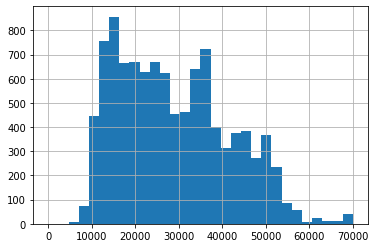

count    10277.000000
mean     28897.441471
std      12930.217472
min          0.000000
25%      17950.000000
50%      27028.000000
75%      37412.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [30]:
# построим гистограмму по расстоянию до ближайшего аэропорта
data['airports_nearest'].hist(bins=30,  range=(0, 70000))
plt.show()
data['airports_nearest'].describe()

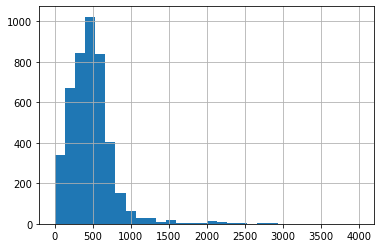

count    4477.000000
mean      478.753406
std       311.446259
min         3.000000
25%       288.000000
50%       456.000000
75%       607.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [31]:
# построим гистограмму по расстоянию до ближайшего парка
data['parks_nearest'].hist(bins=30,  range=(0, 4000))
plt.show()
data['parks_nearest'].describe()

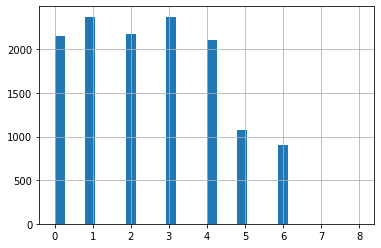

count    13155.000000
mean         2.515469
std          1.797139
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

In [32]:
# построим гистограмму по дню публикации объявления
data['weekday_exposition'].hist(bins=30,  range=(0, 8))
plt.show()
data['weekday_exposition'].describe()

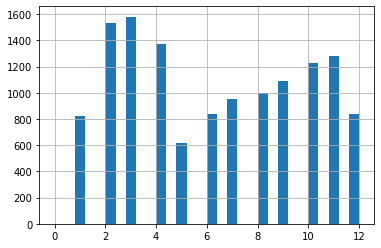

count    13155.000000
mean         6.319726
std          3.495705
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

In [33]:
# построим гистограмму по месяцу публикации объявления
data['month_exposition'].hist(bins=30,  range=(0, 12))
plt.show()
data['month_exposition'].describe()

## Вывод

### Площадь
Общая площадь большинства квартир колеблется в диапазоне от 12 до 100 квадратных метров, больше площадь практически не встречается. Мы убрали из выборки варианты с площадью более 115 квадратных метров.
Аналогично, для дальнейших расчетов по жилой площади и площади кухонь мы убрали выбросы и оставили соответственно квартиры до 76 кв.м. и 19,5 кв.м

### Стоимость
В основном стоимость квартир - от 4 до 5 миллионов. Выбросы есть, но мы не можем их отбрасывать, т.к. о правомерности цены дистанционно дистанционно судить нельзя.

### Комнаты
По убыванию квартиры на продажу состоят из 1, 2 и 3 комнат. Варианты, где 7 комнат возможны. 

### Высота потолков
Большинство вариантов по высоте потолков колеблются в районе 2,65 метров. 
Здесь много данных вызывают подозрения: в минимуме - 1 м., в максимуме - от 4 метров. Поэтому данные мы подвергли корректировке: убрали данные до 2 м., а от высоты потолков свыше 20 м. отняли 10 м. 

### Этажность
Самая распространённая этажность домов - 5, 2 и 1 этажные здания. Больше 25 этажей здания практически не встречаются. 
По типу эажности ожидаемо самая распространенная категория "другая". Первый и последний этажи на продажу встречаются равнозначно.

### Расстояние
Исследуемая недвижимость находится в радиусе:
- 65,0 км. от центра города;
- 84,9 км. от ближайшего аэропорта;
- 3,2 км. от ближайшего парка.
На диаграмме расстояния до центра города мы видим несколько пиков. Вероятно, это указывает на неравномерность плотности жилой застройки
Среднее расстояние до парка - 500 м.
Такие характеристики должны положительно влиять на стоимость недвижимости

### День и месяц публикации объявления
По дням - активность публикаций объявлений в рабочие дни существенно превышает выходные дни
По месяцам - наблюдается 2 пика в феврале-марте и октябре-ноябре. Также можем видеть восходящий тренд с мая по ноябрь (за исключением июня). Пока что миф о том, что "наступление весны нередко «провоцирует» людей на перемены в жизни" подтверждается


# 4.2 Изучаем параметры объектов

### Быстрота продаж квартир

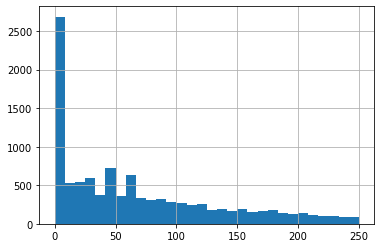

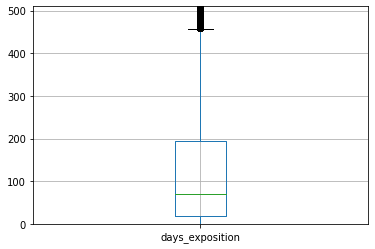

count    13155.000000
mean       152.266667
std        211.846084
min          0.000000
25%         18.000000
50%         69.000000
75%        194.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [34]:
# построим гистограмму по скорости продажи квартир
data['days_exposition'].hist(bins=30,  range=(0, 250))
plt.show()

# построим диаграмму размаха, для уточнения границы выброса. Для признака days_exposition видно, 
# что max значение равно 1580,0 в то время как 75% квартиль равен только 232 дня.
import matplotlib.pyplot as plt 
plt.ylim(0, 510)
data.boxplot('days_exposition') 
plt.show()
# Значение от 510 – выброс. 
data['days_exposition'].describe()

### 
Наблюдаем ярко выраженное распределение Пуассона. Медиана меньше среднего практически в 2 раза, т.е. выбросы оказывают серьезное влияние на распределение данных. 

По нашему мнению продажи до 45 дней можно считать очень быстрыми, от 45 до 95 дней - быстрыми, от 95 дней до 232 дней - медленными, свыше 232 дней - необычайно медленными, за чем должна стоять какая-то причина (например - завышенная цена, депрессивный регион и т.д.)

Видны пики на 45 и 60 дней. Затрудняюсь сказать, но возможно это связано с активизацией продаж после корректировки цены в меньшую сторону, что требует дополнительных исследований, но данных недостаточно

### Изучаем, зависит ли цена от:
общей площади;

жилой площади;

площади кухни;

количества комнат;

этажа, на котором расположена квартира (первый, последний, другой);

даты размещения (день недели, месяц, год).

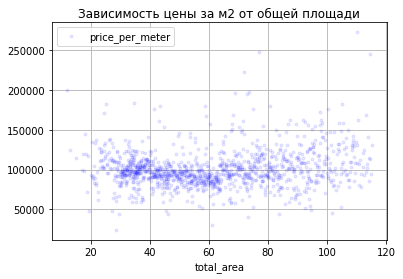

Коэффициент корреляции цены от цены за квадратный метр 0.06186268714591436
Коэффициент корреляции цены от общей площади 0.6773299714703691


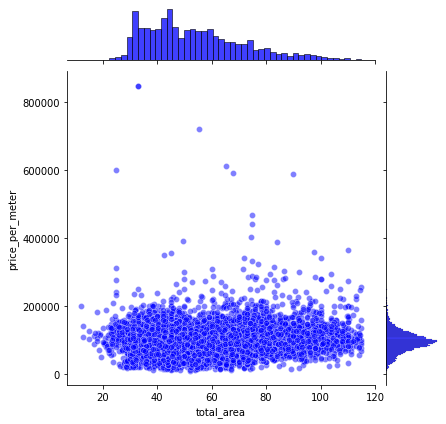

In [35]:
# рассмотрим зависимость цены от общей площади
pd.pivot_table(data, 
               index=["total_area"], 
               values=["price_per_meter"])\
.plot(style='.',title='Зависимость цены за м2 от общей площади', color = "blue", alpha=0.09, grid=True, sharex=False)
plt.show()
# или так поэксперементируем. так сказать, вид сбоку
sns.jointplot(x=data["total_area"], y=data["price_per_meter"], color = "blue", edgecolors = "white", alpha=0.5, kind='scatter')
#  мы очевидно видим высокую концентрацию точек около разметки 100000,0 руб/м2. 
# Благодаря этим гистограммам можно определить уровень концентрации. 
# Также с помощью правой боковой гистограммы можно с распознать, что очевидные выбросы находятся выше отметки 200000 руб/м2. 
# По верхней боковой диаграмме видно, что распределение точек по оси Х является более равномерным 
print('Коэффициент корреляции цены от цены за квадратный метр', data['total_area'].corr(data['price_per_meter']))
print('Коэффициент корреляции цены от общей площади', data['total_area'].corr(data['last_price']))


###  Между этими двумя переменными коэффициент корреляции Пирсона безусловно показывает положительную связь. 

Коэффициент корреляции Пирсона, согласно таблице Чеддока, находится на грани между "заметной" и "высокой" корелляцией между показателями общей площади жилья и ценой за м2.  Коэффициент корелляции между стоимостью жилья и общей площадью практически не отличается от предыдущего.

Хотя на графиках связь между площадью квартиры и цены продажи за м2 не столь ярко выражена. Математика против визуализации

Предположу, что на расчет коэффициента оказали влияние выбросы

### Между этими двумя переменнымикоэффициент показывает положительную корреляцию, но менее выраженную.

Между показателями жилой площади и ценой продажи по коэффициенту корреляции Пирсона, согласно таблице Чеддока, теснота (сила) корреляционной связи оценивается как "заметная".

При этом графики показывают более выраженную связь

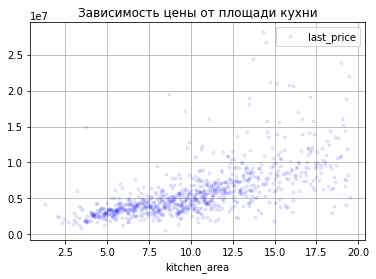

Коэффициент корреляции цены от площади кухни 0.5068295019373514


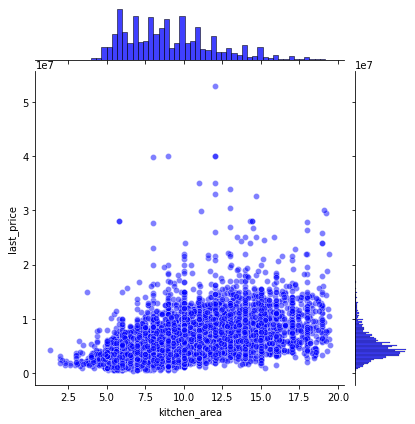

In [37]:
# рассмотрим зависимость цены от площади кухни
pd.pivot_table(data, 
               index=["kitchen_area"], 
               values=["last_price"])\
.plot(style='.',title='Зависимость цены от площади кухни', color = "blue", alpha=0.09, grid=True, sharex=False)
plt.show()
# или так 
sns.jointplot(x=data["kitchen_area"], y=data["last_price"], color = "blue", edgecolors = "white", alpha=0.5, kind='scatter')
#  мы очевидно видим высокую концентрацию точек около разметки 3-4 млн. руб. 
# Также с помощью правой боковой гистограммы можно с распознать, что очевидные выбросы находятся выше отметки 100000 руб 
# По верхней боковой диаграмме видно, что наибольшая концентрация точек по оси Х наблюдается на отрезке 6-10 м 

print('Коэффициент корреляции цены от площади кухни', data['kitchen_area'].corr(data['last_price']))

### По этим переменными также существует положительная корелляция, но уже прослеживается нисходящий тренд.

Между показателями площади кухни и ценой продажи по коэффициенту корреляции Пирсона, согласно таблице Чеддока, теснота (сила) корреляционной связи находится на грани "умеренная" и "заметная" . 

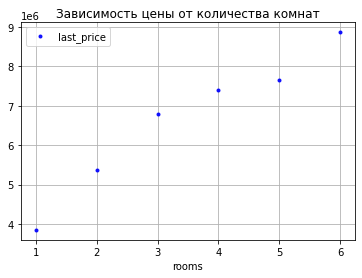

Коэффициент корреляции цены от количества комнат 0.3933256026250542


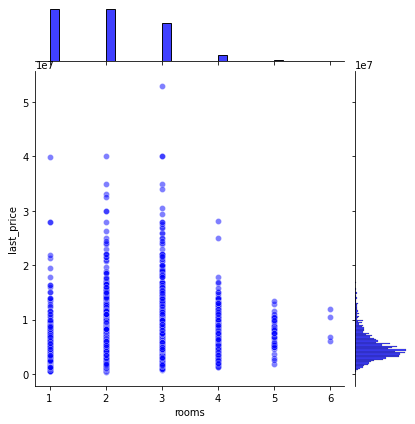

In [38]:
# рассмотрим зависимость цены от количества комнат
pd.pivot_table(data, 
               index=["rooms"], 
               values=["last_price"])\
.plot(style='.',title='Зависимость цены от количества комнат', color = "blue", alpha=0.9, grid=True, sharex=False)
plt.show()
# или так 
sns.jointplot(x=data["rooms"], y=data["last_price"], color = "blue", edgecolors = "white", alpha=0.5, kind='scatter')
#  мы видим наибольшую концентрацию точек около разметки 1-2 комнатных квартир. 
print('Коэффициент корреляции цены от количества комнат', data['rooms'].corr(data['last_price']))

### По этим переменными коэффициент показывает умеренную корелляцию.

При этом 1-й график показывает абсолютную зависимость между этими показателями, 2-й график не дает четкой зависимости


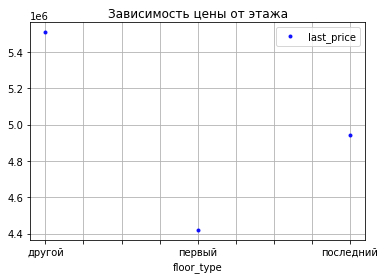

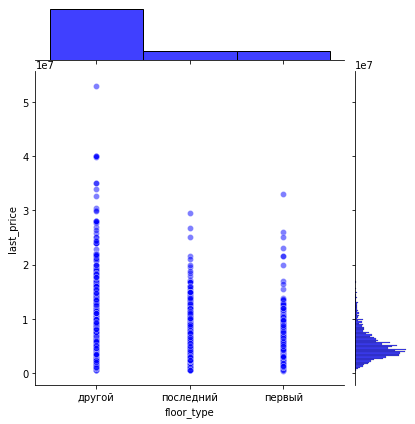

In [39]:
# рассмотрим зависимость цены от этажа
pd.pivot_table(data, 
               index=["floor_type"], 
               values=["last_price"])\
.plot(style='.',title='Зависимость цены от этажа', color = "blue", alpha=0.9, grid=True, sharex=False)
plt.show()
# или так 
sns.jointplot(x=data["floor_type"], y=data["last_price"], color = "blue", edgecolors = "white", alpha=0.5, kind='scatter')
#  мы видим наибольшую концентрацию точек около разметки квартир, не относящихся к первому и последнему этажу. 


### Хуже всего продаются квартиры на 1-м этаже, несколько лучше - на последнем

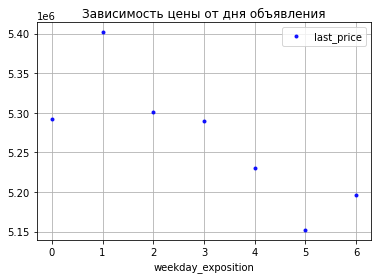

Коэффициент корреляции цены от дня объявления -0.01757523121706865


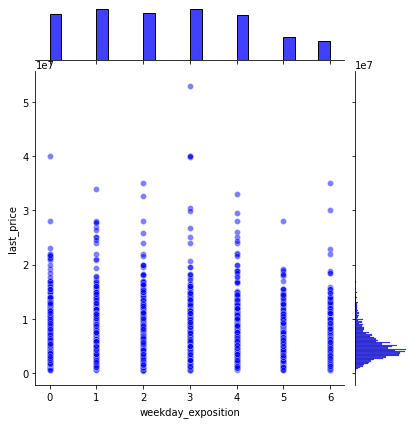

In [40]:
# рассмотрим зависимость цены от дня объявления
pd.pivot_table(data, 
               index=["weekday_exposition"], 
               values=["last_price"])\
.plot(style='.',title='Зависимость цены от дня объявления', color = "blue", alpha=0.9, grid=True, sharex=False)
plt.show()
# или так 
sns.jointplot(x=data["weekday_exposition"], y=data["last_price"], color = "blue", edgecolors = "white", alpha=0.5, kind='scatter')
#  мы видим высокую концентрацию точек около разметки с рабочими днями. 

print('Коэффициент корреляции цены от дня объявления', data['weekday_exposition'].corr(data['last_price']))

### На графиках видно, что по объявлениям, опубликованным в рабочие дни, продается несколько более дорогая недвижимость и чаще публикуется, чем в будние дни 
Коэффициент корелляции зависимость между показателями не показывает

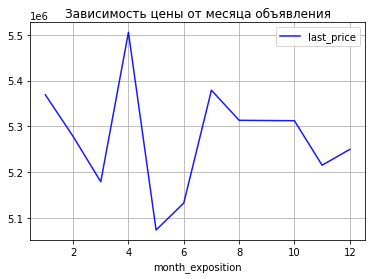

Коэффициент корреляции цены от месяца объявления -0.003728479832371012


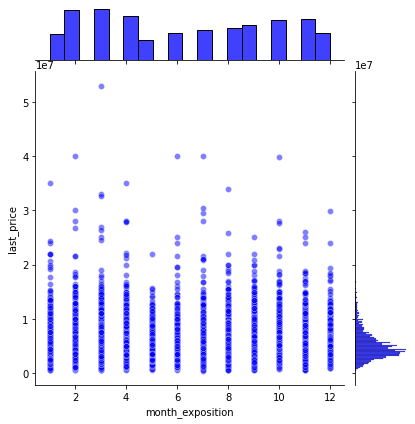

In [41]:
# рассмотрим зависимость цены от месяца объявления
pd.pivot_table(data, 
               index=["month_exposition"], 
               values=["last_price"])\
.plot(style='-',title='Зависимость цены от месяца объявления', color = "blue", alpha=0.9, grid=True, sharex=False)
plt.show()
# или так 
sns.jointplot(x=data["month_exposition"], y=data["last_price"], color = "blue", edgecolors = "white", alpha=0.5, kind='scatter')
#  мы видим высокую концентрацию точек около разметки в районе "февраль-апрель". 

print('Коэффициент корреляции цены от месяца объявления', data['month_exposition'].corr(data['last_price']))

### На 1-м графике видно, что по объявлениям, опубликованным в апреле и сентябре, продается самая дорогая недвижимость. Самая дешевая - в мае.

Поскольку у нас выборка за 6 лет, то можно говорить с уверенностью о наличии "сезонности" продаж

Коэффициент корелляции зависимость между показателями не показывает

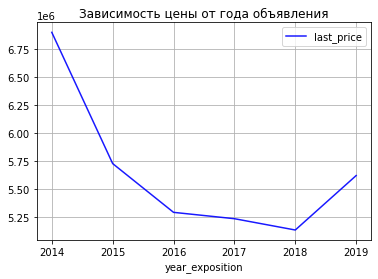

Коэффициент корреляции цены от года объявления -0.003237465526803289


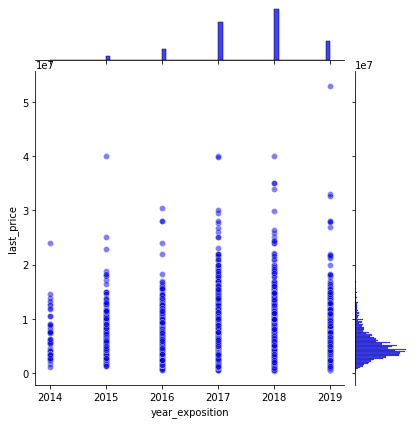

In [42]:
# рассмотрим зависимость цены от года объявления
pd.pivot_table(data, 
               index=["year_exposition"], 
               values=["last_price"])\
.plot(style='-',title='Зависимость цены от года объявления', color = "blue", alpha=0.9, grid=True, sharex=False)
plt.show()
# или так 
sns.jointplot(x=data["year_exposition"], y=data["last_price"], color = "blue", edgecolors = "white", alpha=0.5, kind='scatter')
#  мы видим высокую концентрацию точек около разметки за 2017 -2018 гг. 

print('Коэффициент корреляции цены от года объявления', data['year_exposition'].corr(data['last_price']))

### По объему продаж виден восходящий тренд с 2014 г. по 2018 г. и некоторый спад в 2019 г., по стоимости - с 2014 г. резкое падение рынка до дна в 2018 г. и некоторый отскок в 2019 г.

Тут уместно вспомнить про санкции с 2014 г., которые явно оказали негативное влияние на рынок недвижимости, который до 2019 г. так в полном объеме и не восстановился

Коэффициент корелляции зависимость между показателями не показывает

## Рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [43]:
data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'mean', 'median'])\
.sort_values(('count', 'price_per_meter'), ascending=False)\
.head(10)\
.sort_values(('mean', 'price_per_meter'), ascending=False)

,count,mean,median
,price_per_meter,price_per_meter,price_per_meter
locality_name,,,
Санкт-Петербург,8909,110067.857859,103818.615752
Пушкин,210,101633.049265,98343.136066
Кудрово,182,96917.134898,96848.969958
Парголово,137,90901.351145,91040.462428
Мурино,223,87911.876603,86513.994911
Петергоф,140,85221.088472,82068.213137
Шушары,211,79417.621499,77735.849057
Колпино,198,76045.064382,74729.185405


### Ожидаемо кол-во продаж, средняя стоимость квадрата и медиана наибольшая в Санкт-Петербурге. 
Далее следуют видимо пригородные и модные поселки

Что еще интересно - в 6 случаях из 10 медиана меньше среднего, т.е. в таких поселках есть серьезные выбросы в нижней части распределения. Возможно в таких поселках продается ветхая недвижимость

## Вычислим среднюю цену каждого километра в центре Санкт-Петербурге

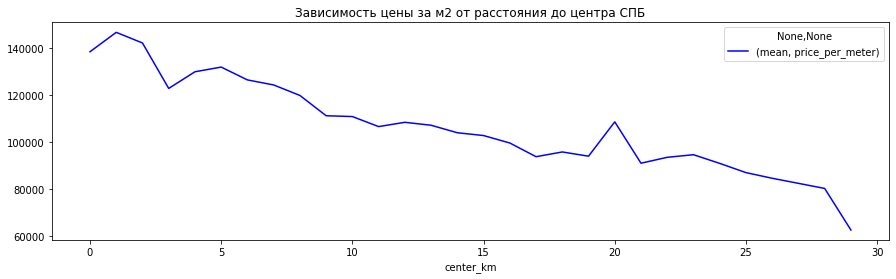

In [44]:
# рассмотрим зависимость цены за м2 от близости к центу СПб
pd.pivot_table(data[data["locality_name"]=="Санкт-Петербург"], 
               index="center_km", 
               values=["price_per_meter"],
               aggfunc=["mean"])\
.plot(style='-',title='Зависимость цены за м2 от расстояния до центра СПБ', color = "blue", figsize=(15,4))
plt.show()

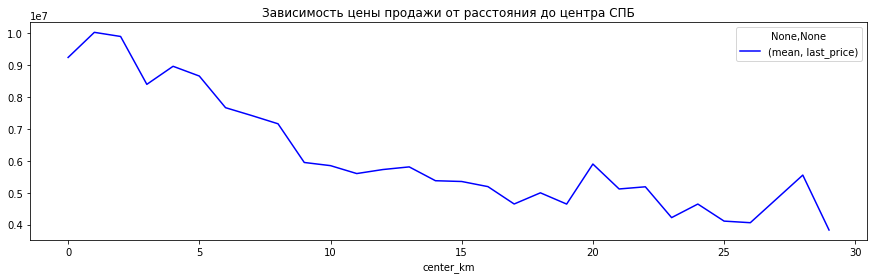

In [45]:
# перепроверим зависимость по цене продажи от близости к центу СПб
pd.pivot_table(data[data["locality_name"]=="Санкт-Петербург"], 
               index="center_km", 
               values=["last_price"],
               aggfunc=["mean"])\
.plot(style='-',title='Зависимость цены продажи от расстояния до центра СПБ', color = "blue", figsize=(15,4))
plt.show()

### Зависимость по общей цене продажи и цене за м2 по центру СПб схожа - удаление от центра ведет к снижению цены

По нашему мнению можно выделить "супер центр" в радиусе 1 км. и центр города - в радиусе 5-6 км. Пиковые ценовые всплески возможно свидетельствуют о наличии каких-то элитных точечных застроек

### Общий вывод

### Продаваемая недвижимость находится в городе, пригородах и недалеких окрестностях (протяженность города 25х52 км), с хорошо развитой инфраструктурой (85 км. до аэропорта) и вписывается в стандарты размещения по парковым зонам (д.б. в доступности не более 20 мин.).

Общая площадь большинства квартир колеблется в диапазоне от 12 до 100 квадратных метров, больше площадь практически не встречается.

В основном стоимость квартир - от 4 до 5 миллионов. 

Самая распространённая этажность домов - 5, 2 и 1 этажные здания. Больше 25 этажей здания практически не встречаются.

По дням - активность публикаций объявлений в рабочие дни существенно превышает выходные дни По месяцам - наблюдается 2 пика в феврале-марте и октябре-ноябре. Также можем видеть восходящий тренд с мая по ноябрь (за исключением июня). 

В среднем квартиры продаются за 151 день. По нашему мнению продажи до 45 дней можно считать очень быстрыми, от 45 до 95 дней - быстрыми, от 95 дней до 232 дней - медленными, свыше 232 дней - необычайно медленными. Видны пики продаж на 45 и 60 дней. 

### В рамках проведенного исследования найдены определенные особенности и зависимости, существующие на рынке недвижимости региона.

На стоимость больше влияет площадь квартиры (жилая площадь, площадь кухни), чем число комнат. 

Первый этаж значительно дешевле остальных вариантов. Также на стоимость квартиры отрицательно влияет нахождение на последнем этаже.

Чаще всего объявления публикуют в рабочие дни.

По объявлениям, опубликованным в апреле и сентябре, продается самая дорогая недвижимость. Самая дешевая - в мае. Можно говорить о "сезонности" продаж.

На стоимость недвижимости 4 года оказывал отрицательное влияние экономический кризис в стране после 2014 г. с "дном" в 2018 г. Некоторый рост наблюдается только в 2019 г. При этом по объему продаж наблюдается обратный тренд: рост с 2014г. по 2018 г. и некоторый спад в 2019 г.

При рассмотрении 10 населённых пунктов с наибольшим числом объявлений установлено:
- количество продаж, средняя стоимость квадратного метра наибольшая в Санкт-Петербурге;
- дешевле всего квадратный метр в Выборге. Средняя стоимость квадратного метра практически в 2 раза меньше, чем в Санкт-Петербурге.

Зависимость по общей цене продажи и цене за м2 по центру Санкт-Петербурге схожа - удаление от центра ведет к снижению цены
По нашему мнению можно выделить "супер центр" в радиусе 1 км. и центр города - в радиусе 5-6 км. 